# Step Function: Lax-Friedrichs


C:\Users\demet\Desktop\Numerical relativity by Bruno\notebooks\Demetry's Hw solutions\HW_1. 2-Step Function


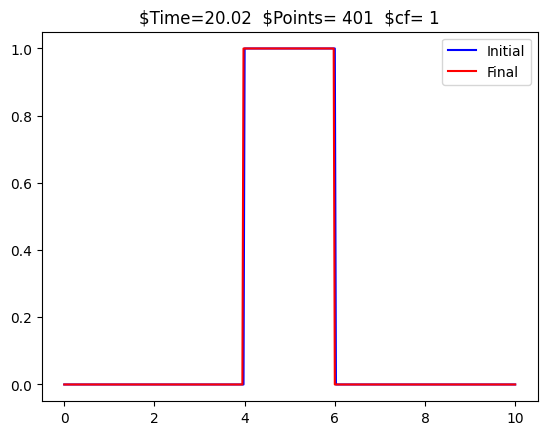

In [63]:
import numpy as np

#define the speed a
a = 1.0

# Define the domain
L = 10     # Domain length
j = 401    # Number of grid points
dx = L/(j-1)   # Grid spacing

x = np.linspace(0,L,j)

# print(x,'\n',dx) #just a check

# Show the time step and the final time
cf = 1
dt = cf*dx/a   # Time step
t_final = 20.0

# print('nx=',j)
# print('dx=',dx)
# print('dt=',dt)
# print('Number of iterations=',t_final/dt)

hello = np.where((x<=6) & (x>=4),1,0)
# Define the initial condition
u_initial = hello
#  np.where( the boundaries, plot u = 1 if it satisfies the boundaries, plot u = 0 if it does not satisify the boundaries).

# Initialize the solution array
u_current = u_initial.copy()

# We create arrays where we will store the time and the L2 norm
l2norm = []
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

#############################################################################################
import matplotlib.pyplot as plt
import os
##create directory where to save images
print(os.getcwd())

os.makedirs('./images_Hw_1-2_Lax-Fried') # makedirs create a new directory in the operating system.

# os.listdir('C:/Users/demet/Desktop/Numerical relativity by Bruno/notebooks/Advection')
########################################################################################################

# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current, color= 'blue')
# plt.ylim(0,1.1)
# plt.xlim(0,10)
plt.title('Time='+str(round(t,2)))
plt.savefig('./images_Hw_1-2_Lax-Fried/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

# Solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # Using np.roll is equivalent to using periodic boundary conditions
    u_next = (np.roll(u_current,-1) + np.roll(u_current,1))/2 - a*(dt/(2*dx))*(np.roll(u_current, -1) - np.roll(u_current, 1))

    # Update the solution
    u_current = u_next.copy()


    #advance the time
    t += dt
    i += 1

    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

    # Plot the current result and save it in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current, color = 'red')
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.xlim(0,10)
        plt.savefig('./images_Hw_1-2_Lax-Fried/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

###############################################################################################################        
# Plot the final solution
plt.plot(x, u_initial, label='Initial', color= 'blue')
plt.plot(x, u_current, label='Final', color = 'red')
plt.title('$Time='+str(round(t,2))+'  $Points= {}'.format(j) + '  $cf= {}'.format(cf))
plt.legend()
plt.show()    


# Courant factor changes:
Increasing the cf will increase the function. If you made the cf value = 1, the function would flow to the right, but no perturbations would appear.

In [61]:
# set the directory where your images are stored
directory = "./images_Hw_1-2_Lax-Fried/"

# get the list of image files in the directory
files = os.listdir(directory)

# print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

###########################################################################################################

import imageio
with imageio.get_writer('./movie_1-2_Lax-Fried.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images_Hw_1-2_Lax-Fried/'+file)
        writer.append_data(image)

files=[]

#########################################################################

# don't worry about the code in this cell, it is just to let you
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie_1-2_Lax-Fried.mp4" type="video/mp4">
</video></div>""")

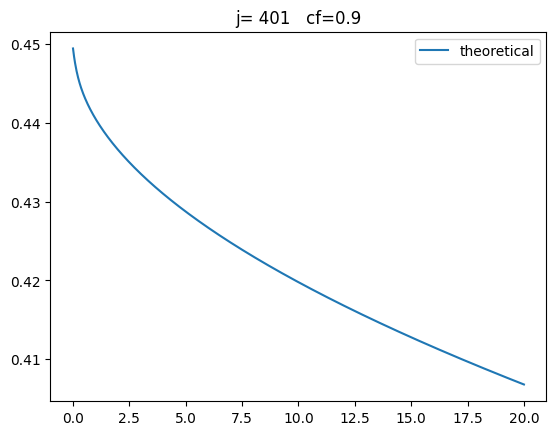

In [62]:
#Compare with data stored
# l2_saved=np.genfromtxt('C:/Users/demet/Desktop/Numerical relativity by Bruno/notebooks/Advection/l2norm_LAX.dat', comments='#')
plt.plot(time,l2norm,label= 'theoretical')
plt.title("j= {}".format(j)+"   cf={}".format(cf))
# plt.plot(l2_saved[:,0], l2_saved[:,1], '+', label= 'experimental')
plt.legend()
plt.show()

# My comments:
As we increase the Courant factor, the function increases, and the maximum of the norm value decreases.
